In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

## 5.1 Baixando um mês de dados meteorológicos
Aqui vamos obter os dados de março de 2012 e limpá-los

Aqui está um modelo de URL que você pode usar para obter dados em Montreal:

In [6]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

Para obter os dados de março de 2013, precisamos formatá-los com `month=3`, `year=2012`.



Infelizmente o link está quebrado e usaremos s dados que estão disponíveis no repositório.

In [19]:
weather_mar2012 = pd.read_csv('pandas-cookbook-master/data/weather_2012.csv')

In [20]:
weather_mar2012

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Vamos plotar

<Axes: >

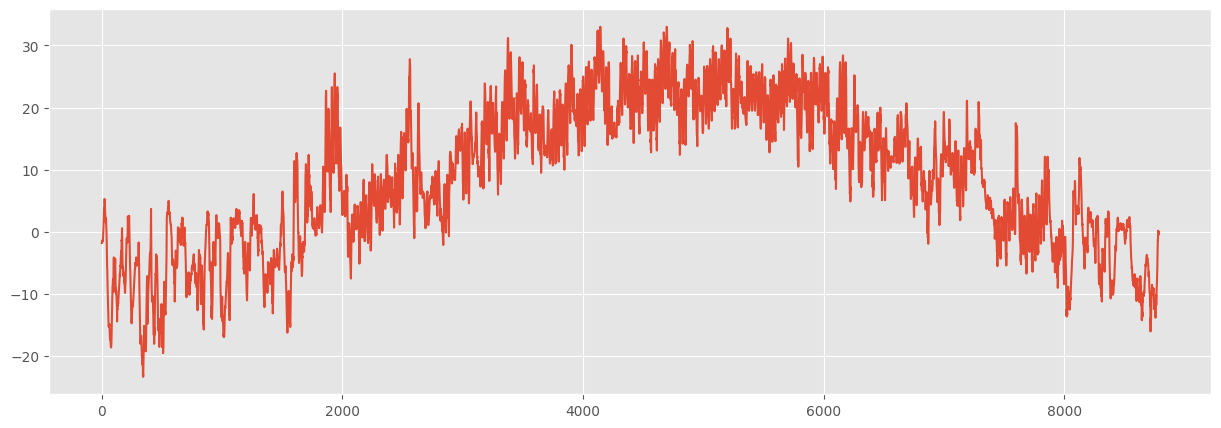

In [21]:
weather_mar2012[u"Temp (C)"].plot(figsize=(15,5))

In [23]:
weather_mar2012.columns = [
    u'Year', u'Month', u'Day', u'Time', u'Data Quality', u'Temp (C)', 
    u'Temp Flag', u'Dew Point Temp (C)', u'Dew Point Temp Flag', 
    u'Rel Hum (%)', u'Rel Hum Flag', u'Wind Dir (10s deg)', u'Wind Dir Flag', 
    u'Wind Spd (km/h)', u'Wind Spd Flag', u'Visibility (km)', u'Visibility Flag',
    u'Stn Press (kPa)', u'Stn Press Flag', u'Hmdx', u'Hmdx Flag', u'Wind Chill', 
    u'Wind Chill Flag', u'Weather']

ValueError: Length mismatch: Expected axis has 8 elements, new values have 24 elements

In [24]:
weather_mar2021 = weather_mar2012.dropna(axis=1, how='any')
weather_mar2012

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Quando alguma coluna ou linha for descartável é só seguir as seguintes instruções: 

O `axis=1` argumento significa "Descartar colunas", como antes. O padrão para operações como `dropna` e `drop` é sempre operar em linhas.

## 5.2 Traçando a temperatura por hora do dia
Este é apenas para diversão -- já fizemos isso antes, usando groupby e agregação! Vamos saber se fica mais frio à noite ou não. Bem, obviamente. Mas vamos fazer isso de qualquer maneira.


`INFELIZMENTE ACONTECERÁ UM ERRO, PORQUE OS DADOS JÁ FORAM MEXIDOS. JÁ ESTÃO SEPARADOS POR HORA E JÁ ESTÁ TODO TRATADO. OS CODIGOS SERÃO MANTIDOS APENAS PELO APRENDIZADO`

In [32]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour
temperatures.groupby('Hour').aggregate(np.median).plot()

<bound method NDFrame.head of       Temp (C)
0         -1.8
1         -1.8
2         -1.8
3         -1.5
4         -1.5
...        ...
8779       0.1
8780       0.2
8781      -0.5
8782      -0.2
8783       0.0

[8784 rows x 1 columns]>


AttributeError: 'RangeIndex' object has no attribute 'hour'

In [31]:
# Dataframe contendo as temperaturas
temperatures = weather_mar2012[[u'Temp (C)']].copy()

# Printando o dataframe
print(temperatures.head)

# Alocando as horas no dataframe das temperaturas
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour

# Agregando as médias das temperaturas em cada hora e plotando num gráfico
#temperatures.groupby('Hour').aggregate(np.median).plot()


<bound method NDFrame.head of       Temp (C)
0         -1.8
1         -1.8
2         -1.8
3         -1.5
4         -1.5
...        ...
8779       0.1
8780       0.2
8781      -0.5
8782      -0.2
8783       0.0

[8784 rows x 1 columns]>


AttributeError: 'RangeIndex' object has no attribute 'hour'

## 5.3 Obtendo o ano inteiro de dados
Ok, e se quisermos os dados do ano inteiro? Idealmente, a API nos permitiria fazer o download, mas não consegui descobrir uma maneira de fazer isso.

Primeiro, vamos colocar nosso trabalho de cima em uma função que obtém o clima para um determinado mês.

Percebi que há um bug irritante em que, quando pergunto janeiro, ele me fornece dados do ano anterior, então vamos consertar isso também. [não mesmo. Você pode conferir =)]

In [33]:
def download_weather_month(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, header=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

In [34]:
download_weather_month(2012, 1)[:5]

TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

Agora podemos obter todos os meses de uma vez. Isso vai demorar um pouco para ser executado.

In [35]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]


TypeError: Passing a bool to header is invalid. Use header=None for no header or header=int or list-like of ints to specify the row(s) making up the column names

Assim que tivermos isso, é fácil concatenar todos os quadros de dados em um grande quadro de dados usando `pd.concat`. E agora temos os dados do ano inteiro!

In [37]:
weather_2012 = pd.concat(data_by_month)
weather_2012

NameError: name 'data_by_month' is not defined

## 5.4 Salvando em um CSV
É lento e desnecessário baixar os dados todas as vezes, então vamos salvar nosso dataframe para uso posterior!

In [38]:
weather_2012.to_csv('../data/weather_2012.csv')

NameError: name 'weather_2012' is not defined